In [ ]:
# Problem 1
import numpy as np

# Parameters
beta_0 = 10.0
beta_1 = 0.5
sigma = 1.0
X_fixed = 2
mean_Y_given_X = beta_0 + beta_1 * X_fixed

# Number of simulations
num_simulations = 1000000

# Simulate Y given X = 2
Y_simulated = np.random.normal(loc=mean_Y_given_X, scale=sigma, size=num_simulations)

# Calculate the probability P(Y > 10 | X = 2)
prob_Y_greater_than_10 = np.mean(Y_simulated > 10)

print(f"Probability that Y > 10 given X = 2: {prob_Y_greater_than_10}")

In [ ]:
#Problem 2 Summary Statistics
import pandas as pd

# Load the scatterplots dataset
salary = pd.read_csv('Salary_dataset.csv')

# Display summary statistics
summary = salary.describe()
print(summary)

In [ ]:
# Problem 2 Code
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load the scatterplots dataset
salary = pd.read_csv('Salary_dataset.csv')

# Problem 2A
#  Plot Salary against YearsExperience as a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(salary['YearsExperience'], salary['Salary'], color='blue', label='Data points')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatterplot of Salary vs. Years of Experience')
plt.legend()
plt.grid(True)
plt.show()

## Problem 2C using statsmodels
# Fit the SLR model using LinearRegression
X = salary[['YearsExperience']]  # Predictor variable
y = salary['Salary']  # Response variable

# Add a constant to the predictor variable (intercept term)
betas = sm.add_constant(X)
betas.rename(columns={'const': 'salary_intercept'}, inplace=True)


# Create and fit the model
model = sm.OLS(y, betas).fit()

# Print the confidence intervals at 95%
print(model.summary())
print("\n95% Confidence Intervals:")
print(model.conf_int(alpha=0.05))

# Predict the value for a given x value (e.g., YearsExperience = 5)
x_value = 5
input_data = pd.DataFrame({'salary_intercept': [1], 'YearsExperience': [x_value]})
predicted_value = model.predict(input_data)
print(f"\nPredicted Salary for {x_value} years of experience: {predicted_value[0]}")
# He is earning under the predicted amount

# Predict the value and confidence interval for 10 years of experience
input_data_10 = pd.DataFrame({'salary_intercept': [1], 'YearsExperience': [10]})
prediction_10 = model.get_prediction(input_data_10)
prediction_summary_10 = prediction_10.summary_frame(alpha=0.05)
print(prediction_summary_10)
predicted_value_10 = prediction_summary_10['mean'][0]
conf_int_10 = prediction_summary_10[['mean_ci_lower', 'mean_ci_upper']].iloc[0]

print(f"\nPredicted Salary for {10} years of experience: {predicted_value_10}")
print(f"95% Confidence Interval for the prediction: ({conf_int_10['mean_ci_lower']}, {conf_int_10['mean_ci_upper']})")

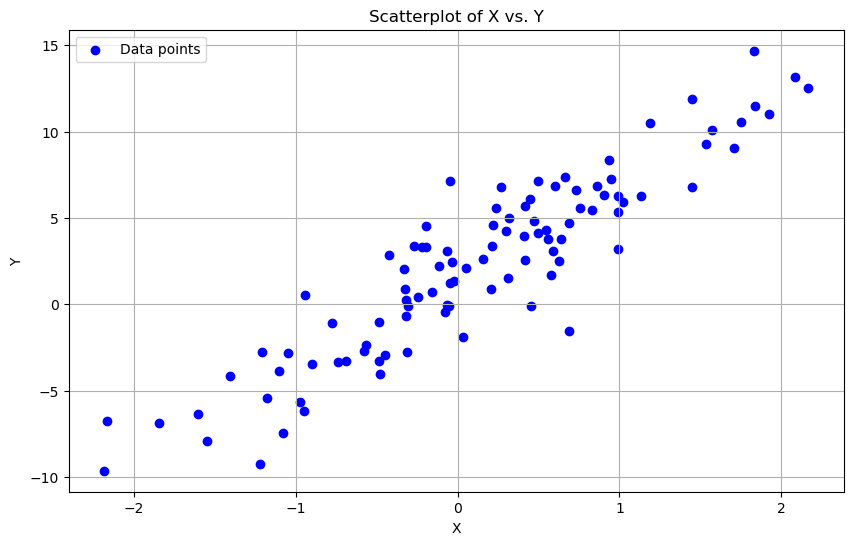

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     518.2
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           6.52e-41
Time:                        15:04:54   Log-Likelihood:                -215.84
No. Observations:                 100   AIC:                             435.7
Df Residuals:                      98   BIC:                             440.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
b0-intercept     1.6567      0.214      7.753   

In [60]:
# Problem 3 Code

# Problem 2 Code
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#Generate 100 random numbers from a standard normal distribution for X
X = np.random.normal(loc=0, scale=1, size=100)

# Define the coefficients β0 and β1
beta_0 = 2.0  # Intercept
beta_1 = 5.0  # Slope

#Generate the error term ε from a normal distribution with mean 0 and standard deviation σ
sigma = 2.0  # Standard deviation of the error term
epsilon = np.random.normal(loc=0, scale=sigma, size=100)

# Calculate the response variable Y
Y = beta_0 + beta_1 * X + epsilon

#  Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of X vs. Y')
plt.legend()
plt.grid(True)
plt.show()

# Using statsmodels Fit the SLR model using LinearRegression
# Add a constant to the predictor variable (intercept term)
betas = sm.add_constant(X)
betas = pd.DataFrame(betas, columns=['b0-intercept', 'b1-X'])

# Create and fit the model
model = sm.OLS(Y, betas).fit()

# Print the confidence intervals at 95%
print(model.summary())

# Extract the estimate of σ^2 (s2)
s2 = model.mse_resid
print(f"Estimated σ^2 (s2): {s2}")

# Compare the estimated σ^2 with the true value
print(f"True σ^2: {sigma**2}")

# Explanation
print("The estimates are not exactly the same as the true values because the estimates are based on a finite sample of data. In practice, the observed data includes random noise, which causes the estimates to vary around the true values. The larger the sample size, the closer the estimates will be to the true values.")
